In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('mental_health_digital_behavior_data.csv')
print(df)

     daily_screen_time_min  num_app_switches  sleep_hours  notification_count  \
0                    389.8                53          5.9                  89   
1                    351.7                52          7.2                  79   
2                    398.9                39          8.0                 108   
3                    451.4                44          6.5                  78   
4                    346.0                43          6.9                  35   
..                     ...               ...          ...                 ...   
495                  392.3                58          6.0                 114   
496                  297.8                56          6.8                  47   
497                  348.6                42          6.1                  97   
498                  307.5                33          7.2                  67   
499                  277.0                41          6.1                  86   

     social_media_time_min 

In [2]:
df.isnull().sum()

,0
daily_screen_time_min,0
num_app_switches,0
sleep_hours,0
notification_count,0
social_media_time_min,0
focus_score,0
mood_score,0
anxiety_level,0
digital_wellbeing_score,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_screen_time_min    500 non-null    float64
 1   num_app_switches         500 non-null    int64  
 2   sleep_hours              500 non-null    float64
 3   notification_count       500 non-null    int64  
 4   social_media_time_min    500 non-null    float64
 5   focus_score              500 non-null    float64
 6   mood_score               500 non-null    float64
 7   anxiety_level            500 non-null    float64
 8   digital_wellbeing_score  500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [4]:
df.head()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7


In [5]:
df.describe()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,360.437800,49.840000,6.557400,79.51200,121.771800,6.998000,8.988600,8.451800,52.310400
std,58.782476,7.340993,1.192043,23.97974,43.809443,0.618742,0.519104,2.134425,7.943186
min,180.000000,30.000000,3.000000,20.00000,30.000000,5.500000,7.400000,1.000000,34.600000
25%,317.975000,44.000000,5.800000,63.00000,91.875000,6.600000,8.600000,7.275000,46.800000
50%,360.800000,50.000000,6.500000,80.00000,119.550000,7.000000,9.000000,9.700000,51.000000
75%,398.175000,55.000000,7.325000,96.00000,149.500000,7.400000,9.300000,10.000000,56.600000
max,591.200000,72.000000,10.000000,158.00000,296.700000,8.600000,10.000000,10.000000,80.800000


In [6]:
# Select all numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix on numeric columns only
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                         daily_screen_time_min  num_app_switches  sleep_hours  \
daily_screen_time_min                 1.000000          0.023647     0.021925   
num_app_switches                      0.023647          1.000000    -0.035521   
sleep_hours                           0.021925         -0.035521     1.000000   
notification_count                   -0.048770         -0.009962    -0.072939   
social_media_time_min                -0.006065          0.003602     0.013113   
focus_score                          -0.306948         -0.279350     0.010128   
mood_score                            0.073800         -0.160559     0.050059   
anxiety_level                         0.003953         -0.028695     0.014952   
digital_wellbeing_score              -0.087824         -0.080687     0.440426   

                         notification_count  social_media_time_min  \
daily_screen_time_min             -0.048770              -0.006065   
num_app_switches                  -0.009962      

In [7]:
# CATEGORICAL GRAPH

# Histogram plot: Plot for Digital Wellbeing Score

def create_histogram_plot(df, column='digital_wellbeing_score'):

  """
    Plot a histogram of the specified column with KDE overlay, and highlight mean and median.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to plot.

    Functionality:
        - Calculates mean and median of the specified column.
        - Plots histogram with 15 bins and KDE.
        - Highlights mean with a solid red vertical line.
        - Highlights median with a dashed blue vertical line.
        - Adds a legend identifying the mean and median lines.
        - Adds grid lines on the y-axis for clarity.
        - Sets the plot title and axis labels according to the column name.

    Returns:
        None. Displays the plot.
    """

  # Calculate statistics
  mean = df[column].mean()
  median = df[column].median()

  # Set the size of the figure
  plt.figure(figsize=(12,8))

  # Plot histogram with 15 bins and a smooth kde curve
  sns.histplot(df[column], bins=15, kde=True, edgecolor='black', color='teal')

  # Highlight mean, median
  plt.axvline(mean, color='red', linestyle='-', linewidth=2, label=f"Mean: {mean:.2f}")
  plt.axvline(median, color='blue', linestyle='--', linewidth=2, label=f"Median: {median:.2f}")

  # Add title and axis labels with fontsize
  plt.title(f'Distribution of {column.replace("_", " ").title()}', fontsize=16)
  plt.xlabel(column.replace("_", " ").title(), fontsize=14)
  plt.ylabel('Frequency', fontsize=14)

  # Add horizontal grid lines along y axis
  plt.grid(axis='y', linestyle='--', alpha=0.7)

  # Displays the label in the plot
  plt.legend()

  # Display the plot
  plt.show()

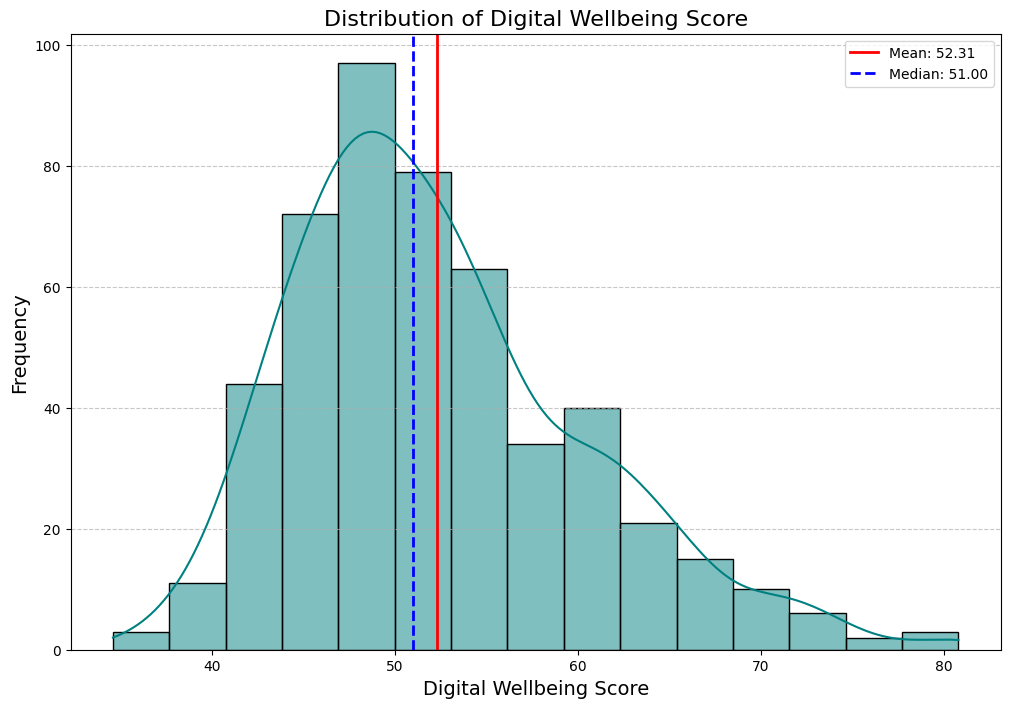

In [8]:
create_histogram_plot(df)

In [9]:
# RELATIONAL GRAPH

# Scatter Plot- Screen Time vs Sleep Hours

def create_scatter_plot(data, x_col, y_col, title="Scatter Plot"):

  """
    Create a scatter plot showing the relationship between two variables with a regression line and correlation annotation.

    Parameters:
        data (pandas.DataFrame): The dataset containing variables to plot.
        x_col (str): The name of the column to plot on the x-axis.
        y_col (str): The name of the column to plot on the y-axis.
        title (str): Title of the plot.

    Functionality:
        - Plots a scatter plot of x_col vs y_col with moderate transparency.
        - Fits and plots a linear regression line on the scatter plot.
        - Adds a legend describing the regression line equation.
        - Annotates the plot with the Pearson correlation coefficient.
        - Adjusts layout and grid for clear visualization.

    Returns:
        None: Displays the plot and prints correlation and regression equation in console.

    """

  # Set the size of the figure
  plt.figure(figsize=(12,8))

  # Scatter plot with moderate transparency and coral color
  plt.scatter(data[x_col], data[y_col], alpha=0.6, color='coral', s=50)

  # Add title and label with fontsize
  plt.title(f'{title}: {x_col} vs {y_col}', fontsize=14)
  plt.xlabel(x_col, fontsize=12)
  plt.ylabel(y_col, fontsize=12)

  # Add grid lines
  plt.grid(alpha=0.3)

  # Calculate linear regression parameters (slope and intercept)
  x = data[x_col]
  y = data[y_col]
  m, b = np.polyfit(x, y, 1)
  x_line = np.linspace(x.min(), x.max(), 100)

  # Plot regression line with label
  plt.plot(x_line, m * x_line + b, color='blue', linewidth=2, label=f"Regression Line: y={m:.2f}x+{b:.2f}")

  # Place legend in upper left, set fontsize
  plt.legend(loc='upper left', fontsize=10)

  # Offset annotation to avoid overlap (xy=(0.05, 0.85) is lower than legend)
  correlation = data[x_col].corr(data[y_col])
  plt.annotate(f'Correlation: {correlation:.3f}',    # Show the correlation Value
               xy=(0.05, 0.85),                      # (x,y) coordinates where the annotations will appear, in the axes fraction system
               xycoords='axes fraction',             # Intercepts 'xy' as a fraction of the axes
               bbox=dict(boxstyle="round,pad=0.4",   # Draws the annotation inside a rounded box
                         fc="white",                 # Box facecolor
                         ec="gray",                  # Box edgecolor
                         alpha=0.9),                 # Box transparency
               fontsize=10)                          # Fontsize for the annotation text

  # Adjust layout to ensure no overlap of plot elements
  plt.tight_layout()

  # Display the plot
  plt.show()

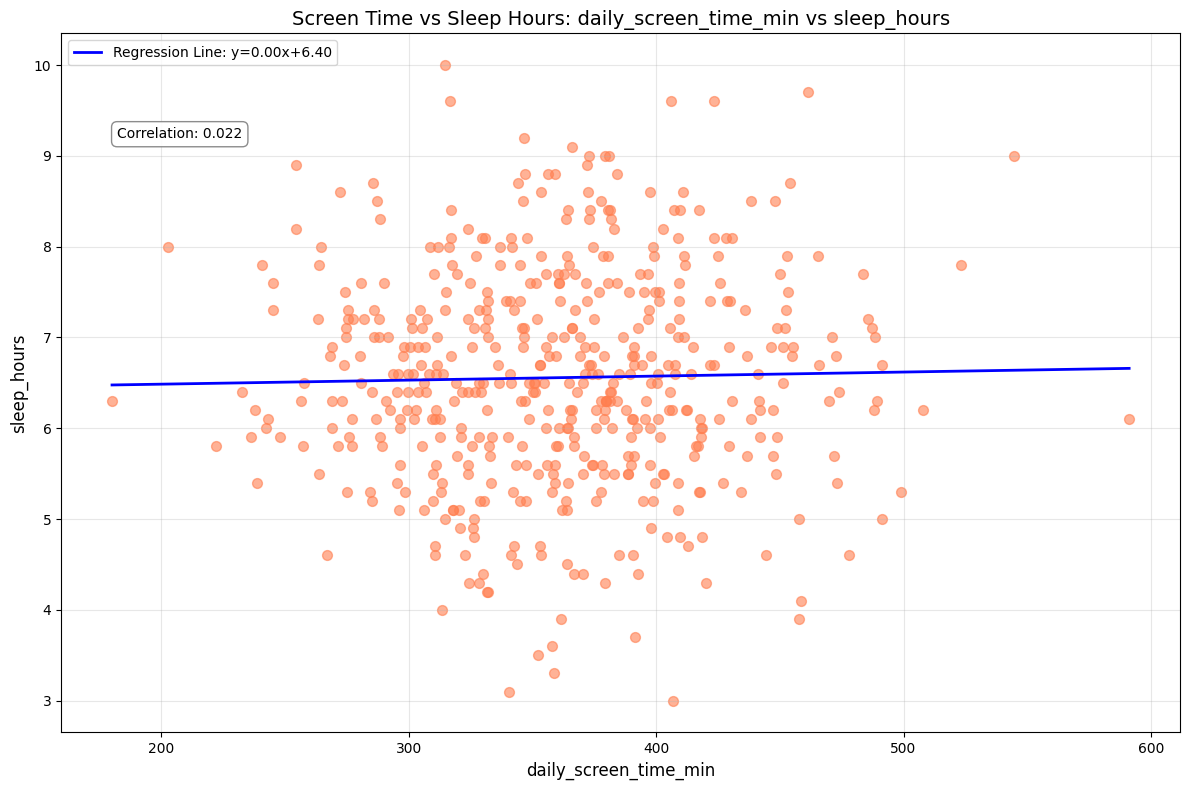

In [10]:
create_scatter_plot(df, 'daily_screen_time_min', 'sleep_hours', title='Screen Time vs Sleep Hours')

In [11]:
# STATISTICAL GRAPH

# Heatmap:Correlation Heatmap of mental health and digital behaviour data

def create_heatmap(df):

  """
    Generate a correlation heatmap for the given DataFrame, visualizing the relationships between different variables related to mental health and digital behavior.

    Parameters:
        df (pandas.DataFrame): A DataFrame containing the dataset, which should include numerical columns for correlation analysis.

    The function performs the following:
        - Computes the correlation matrix of all numeric columns in the DataFrame.
        - Plots a heatmap using seaborn, with annotations displaying the correlation coefficients.
        - Uses the 'viridis' colormap for visualizing positive and negative correlations.
        - Adjusts layout for clear reading of labels and annotations.
        - Adds a descriptive title to the heatmap.

    Returns:
        None. The function displays the plot directly, suitable for visual analysis.
  """
  # Set the size of the figure
  plt.figure(figsize=(12,8))

  # The correlation matrix
  corr=df.corr()

  # Plot a heatmap to visualize the correlation matrix:
  # annot=True displays the correlation coefficient numbers on the heatmap cells
  # cmap='coolwarm' sets the color scheme (cool colors for negative, warm colors for positive correlations)
  # fmt=numerical formatting in each cell
  sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidth=0.5)

  # Add title with fontsize
  plt.title('Correlation Heatmap of mental health and digital behaviour data',fontsize=16)

  # Adjust layout to ensure no overlap of plot elements
  plt.tight_layout()

  # Display the plot
  plt.show()

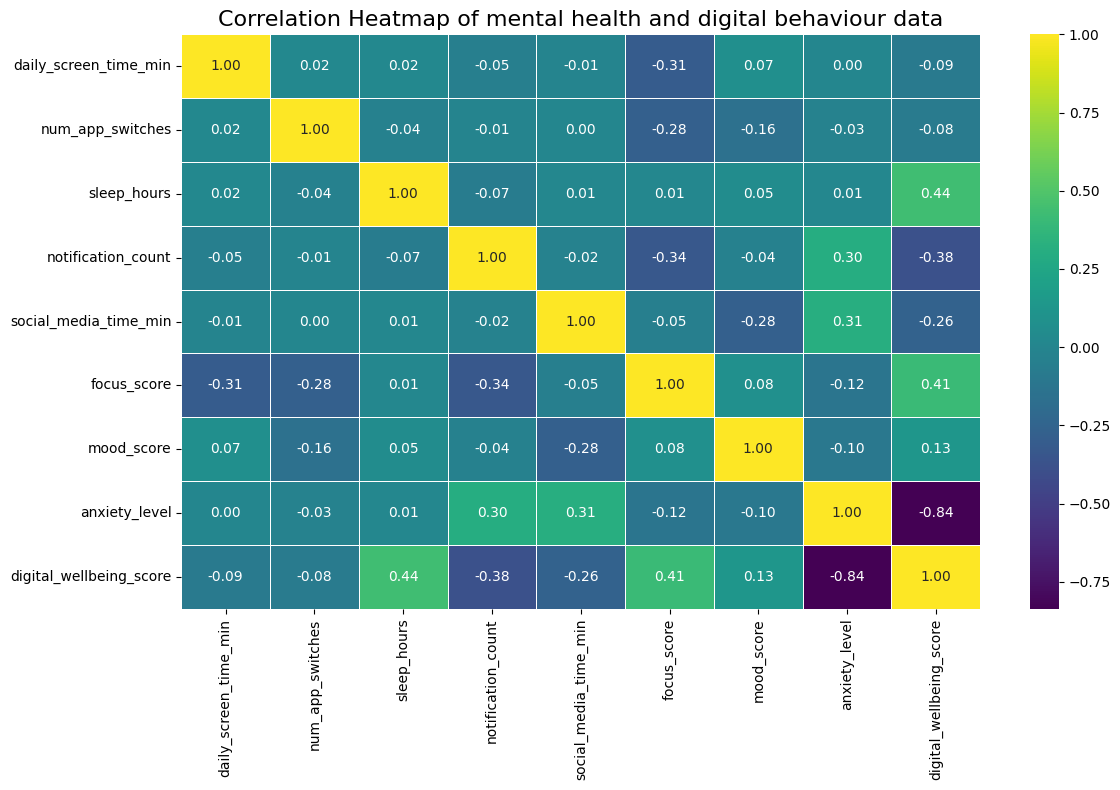

In [12]:
create_heatmap(df)

In [13]:
# An elbow plot

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def calculate_silhouette_and_inertia(data, n_clusters):

  """
    Compute silhouette score and within-cluster sum of squares (WCSS) for KMeans clustering.

    Parameters:
        data (array-like or DataFrame): The dataset on which clustering is performed.
        n_clusters (int): Number of clusters to form.

    Returns:
        tuple:
            - silhouette_avg (float): Mean silhouette coefficient for all samples,
              measuring how well samples are clustered.
            - inertia (float): Sum of squared distances of samples to their closest cluster center
              (WCSS), indicating cluster compactness.
    """
  """ Compute silhouette score and WCSS (inertia) for KMeans with n_clusters on given data."""

  # Initialize KMeans with specified number of clusters and fixed random seed for reproducibility
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)

  # Fit KMeans to data and assign cluster labels to each sample in one step
  labels = kmeans.fit_predict(data)

  # Compute average silhouette score to evaluate clustering quality (range: -1 to 1)
  silhouette_avg = silhouette_score(data, labels)

  # Calculate WCSS: sum of squared distances of samples to nearest cluster center, measuring cluster compactness
  inertia = kmeans.inertia_

  # Return silhouette score and WCSS for further analysis
  return silhouette_avg, inertia



def find_best_clusters(data, k_min=2, k_max=10):
  """
    Determine the best number of clusters by evaluating silhouette scores and computing WCSS
    over a range of cluster counts.

    Parameters:
        data (array-like or DataFrame): Dataset for clustering analysis.
        k_min (int): Minimum number of clusters to test. Default is 2.
        k_max (int): Maximum number of clusters to test. Default is 10.

    Returns:
        tuple:
            - best_n (int): The number of clusters with the highest silhouette score.
            - wcss (list of float): List of WCSS values corresponding to each tested cluster count.
    """

  """Evaluate silhouette scores and WCSS over cluster range; return best k and WCSS list."""

  # Initialize list to store within-cluster sum of squares (WCSS) for each k
  wcss = []

  # Placeholder for the best number of clusters based on silhouette score
  best_n = None

  # Initialize best silhouette score to negative infinity
  best_score = -np.inf

  # Loop through cluster counts from k_min to k_max
  for n in range(k_min, k_max + 1):
     score, inertia = calculate_silhouette_and_inertia(data, n)       # Calculate silhouette score and WCSS for current n
     wcss.append(inertia)                                             # Append WCSS value to list for plotting
     if score > best_score:                                           # Check if current silhouette score exceeds the best known
        best_score = score                                            # Update the best score
        best_n = n                                                    # Update the best number of clusters
     print(f"{n} clusters silhouette score = {score:.2f}")            # Print silhouette score for current n
  print(f"Best number of clusters = {best_n}")                        # Output the optimal number of clusters
  return best_n, wcss                                                 # Return the best cluster count and list of WCSS for plotting



def plot_elbow(wcss, best_n, k_min=2):
   """
    Plot the Elbow Method graph showing WCSS versus the number of clusters,
    highlighting the best cluster count.

    Parameters:
        wcss (list of float): Within-cluster sum of squares values for cluster counts tested.
        best_n (int): The recommended optimal number of clusters.
        k_min (int): Minimum number of clusters tested, used to align x-axis ticks.
    """

   """Plot WCSS for clusters and mark the best cluster count."""
   k_range = range(k_min, k_min + len(wcss))

   # Set the size of the figure
   plt.figure(figsize=(12, 8))
   plt.plot(k_range, wcss, 'bx-', label='WCSS')

   # Set title and axis label
   plt.xlabel('Number of Clusters (k)')
   plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
   plt.title('Elbow Method For Optimal k')

   # Position where ticks should be placed
   plt.xticks(k_range)

   # Showing the value of best cluster
   plt.axvline(x=best_n, color='r', linestyle='--', label=f'Best k = {best_n}')

   # Display label of the plot
   plt.legend()

   # Add grid lines
   plt.grid(True)

   # Display the plot
   plt.show()

2 clusters silhouette score = 0.31
3 clusters silhouette score = 0.26
4 clusters silhouette score = 0.24
5 clusters silhouette score = 0.25
6 clusters silhouette score = 0.24
7 clusters silhouette score = 0.23
8 clusters silhouette score = 0.23
9 clusters silhouette score = 0.22
10 clusters silhouette score = 0.20
Best number of clusters = 2


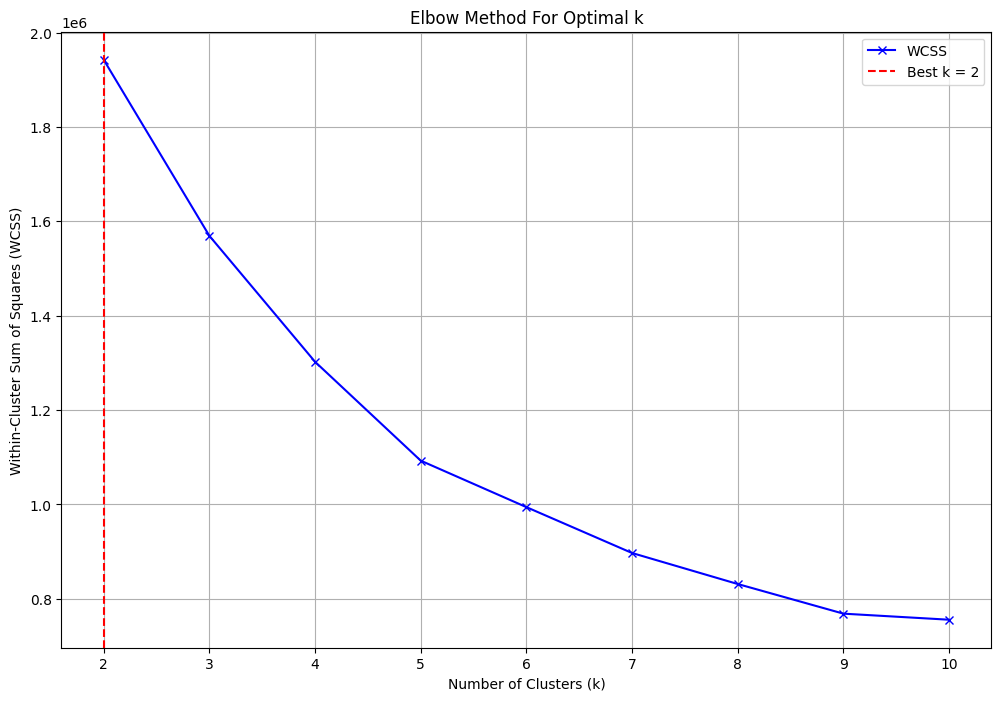

In [14]:
features = ['daily_screen_time_min', 'notification_count']
best_clusters, wcss_values = find_best_clusters(df)
plot_elbow(wcss_values, best_clusters)


**Line Fitting**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def r2_score_manual(
    y_true: np.ndarray,
    y_pred: np.ndarray
) -> float:
    """
    Compute the coefficient of determination (R^2 score) for a set of observed and predicted values.

    Args:
        y_true (array-like): Ground truth (actual) target values.
        y_pred (array-like): Estimated target values (model predictions).

    Returns:
        float: The R^2 score, a value between -∞ and 1, where 1 indicates perfect prediction.

    The function calculates:
        - The sum of squared residuals (ss_res): sum((y_true - y_pred)^2)
        - The total sum of squares (ss_tot): sum((y_true - mean(y_true))^2)
        - R^2 = 1 - (ss_res / ss_tot)
    """
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

print("Libraries ready.")


Libraries ready.


**1) Linear Fitting**

In [16]:
def linear_regression_analysis(df, x_col, y_col):
    """
    Perform linear regression analysis on specified DataFrame columns.
    - Drops missing values in the selected columns.
    - Fits a linear model using scipy's linregress.
    - Prints regression equation, R^2, p-value, and standard error.
    - Plots observed data points and the fitted regression line.
    - Calculates, prints residuals and their mean.

    Args:
        df (pandas.DataFrame): Data containing columns for analysis.
        x_col (str): The predictor variable column name.
        y_col (str): The response variable column name.
    """
    # Extract data and remove missing values
    data = df[[x_col, y_col]].dropna()
    x = data[x_col].astype(float).values  # Convert the predictor column to float numpy array for numerical computations
    y = data[y_col].astype(float).values  # Convert the response column to float numpy array for numerical computations

    # Perform linear regression
    result = stats.linregress(x, y)    # Perform linear least-squares regression on x and y data arrays
    slope = result.slope               # Extract slope coefficient of the fitted regression line
    intercept = result.intercept       # Extract intercept of the regression line
    r_value = result.rvalue            # Pearson correlation coefficient between x and y
    p_value = result.pvalue            # Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero
    std_err = result.stderr            # Standard error of the estimated slope

    # Calculate predicted y using the regression line
    y_hat = intercept + slope * x

    # Print regression stats
    print(f"Line: y = {slope:.3f} x + {intercept:.3f}")   # Print the regression line equation in slope-intercept form with formatting to 3 decimal places
    print(f"R^2: {r_value**2:.4f}")                       # Print the coefficient of determination (R squared) to 4 decimal places, indicating goodness of fit
    print(f"p-value (slope): {p_value:.4g}")              # Print the p-value for the null hypothesis that the slope is zero, formatted with 4 significant digits
    print(f"Std. error of slope: {std_err:.3f}")          # Print the standard error of the estimated slope with 3 decimal places for precision

    # Plot observed data and regression line
    plt.scatter(x, y, label='Observed')
    plt.plot(x, y_hat, color='red', label='Fitted line')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('Linear Regression Analysis')
    plt.legend()
    plt.show()

    # Residuals
    residuals = y - y_hat
    print("Residuals:", residuals)
    print("Mean of residuals:", np.mean(residuals))


Line: y = -0.024 x + 8.171
R^2: 0.0780
p-value (slope): 2.046e-10
Std. error of slope: 0.004


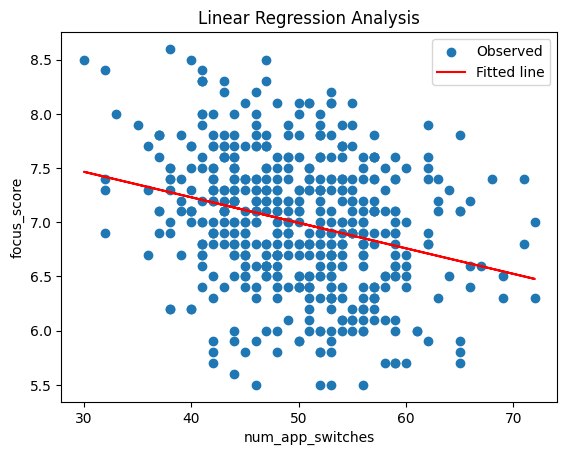

Residuals: [-1.23597013e-01 -1.44714226e+00 -5.53230499e-01 -1.13550425e+00
  1.04095050e+00  1.23224252e-01  7.03147498e-02  7.70583983e-01
 -2.82594752e-01  5.11855477e-01  1.12931249e+00 -7.52961266e-01
  2.11586244e-01 -1.94232760e-01 -1.29685250e-01 -3.11959005e-01
 -1.82594752e-01 -7.70687511e-01  6.11586244e-01  1.11586244e-01
 -1.11959005e-01 -1.52961266e-01 -9.17778009e-01  1.35131493e-01
 -1.02968525e+00  6.35400726e-01 -5.70687511e-01  7.93859999e-01
  5.40950497e-01  2.17405248e-01  4.76402987e-01 -1.06486851e+00
  4.58676742e-01  1.82221991e-01  1.82221991e-01  1.22349348e+00
  4.64495746e-01  3.35131493e-01 -7.35235021e-01 -6.23597013e-01
 -4.06140001e-01 -1.47142262e-01 -3.58780270e-01  1.09386000e+00
  8.64495746e-01  2.35131493e-01 -2.29685250e-01 -5.06140001e-01
 -6.29416017e-01  6.44957458e-02  1.23493485e-01 -3.00051764e-01
  3.64495746e-01 -5.90495032e-02 -9.47142262e-01 -6.17778009e-01
  1.17405248e-01  1.10576724e+00  7.11855477e-01 -9.00051764e-01
  3.52857738e-

In [17]:
linear_regression_analysis(df, 'num_app_switches', 'focus_score')


**2)Exponential Fitting**

In [18]:
def exponential_func(x, a, b):
    """Exponential model function a * exp(b * x)."""
    return a * np.exp(b * x)

def fit_exponential_curve(df, x_col, y_col, p0=(1.0, 0.1)):

    """
    Fit exponential curve y = a * exp(b * x) on DataFrame columns and plot results.

    Parameters:
    - df: pandas DataFrame containing data.
    - x_col: str, name of independent variable column.
    - y_col: str, name of dependent variable column.
    - p0: tuple, initial guess parameters for curve_fit.

    Returns:
    - popt: Optimized parameters a and b.
    - pcov: Covariance of parameters.
    """
    # Extract and clean data
    data = df[[x_col, y_col]].dropna()
    x = data[x_col].astype(float).values
    y = data[y_col].astype(float).values

    # Fit exponential curve using initial guess p0
    # Fit the exponential function 'exponential_func' to the data (x, y)
    # 'p0' provides initial guess parameters for the fit (helps algorithm start)
    # 'maxfev=10000' increases maximum function evaluations to allow convergence
    # 'popt' contains optimized parameters (best-fit coefficients for the exponential curve)
    # 'pcov' is the covariance matrix representing parameter estimation uncertainty
    popt, pcov = curve_fit(exponential_func, x, y, p0=p0, maxfev=10000)

    # Predicted values from fit
    y_hat = exponential_func(x, *popt)

    # Print fitted formula and R^2 score
    print(f"Fitted: y = {popt[0]:.3f} * exp({popt[1]:.3f} * x)") # Print the fitted exponential curve equation with parameters a and b formatted to 3 decimals
    print(f"R^2: {r2_score(y, y_hat):.4f}")                      # Print the coefficient of determination (R²) to assess goodness of fit, rounded to 4 decimals


    # Plot original data and fitted curve
    x_fit = np.linspace(x.min(), x.max(), 200)
    plt.figure()
    plt.scatter(x, y, label="Data")
    plt.plot(x_fit, exponential_func(x_fit, *popt), color='red', label="Fitted exponential")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title("Exponential Curve Fit on Dataset")
    plt.legend()
    plt.show()

    return popt, pcov

Fitted: y = 6.856 * exp(0.002 * x)
R^2: 0.0930


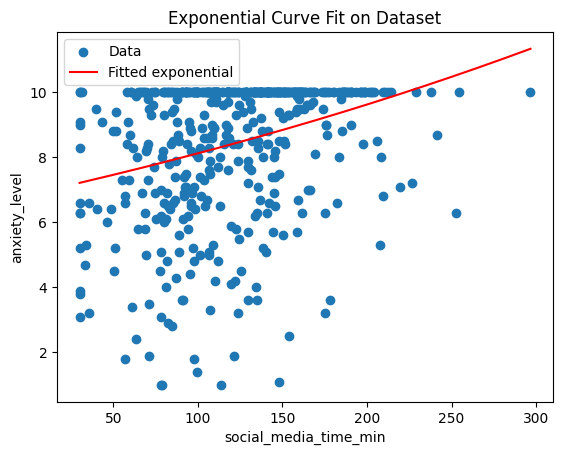

(array([6.85631840e+00, 1.69637766e-03]),
 array([[ 5.01588102e-02, -5.08174228e-05],
        [-5.08174228e-05,  5.77196374e-08]]))

In [19]:
fit_exponential_curve(df, 'social_media_time_min', 'anxiety_level', p0=(5.0, 0.002))

**3) Polynomial Fitting — NumPy, SciPy, scikit-learn**

In [20]:
def r2_score_manual(y_true, y_pred):

    """
    Calculate R-squared (coefficient of determination) manually.

    Parameters:
    y_true (array-like): True response values.
    y_pred (array-like): Predicted response values.

    Returns:
    float: R-squared value indicating goodness of fit.
    """
    y_true = np.asarray(y_true)                        # Convert to numpy array for consistency
    y_pred = np.asarray(y_pred)                        # Convert to numpy array for consistency
    ss_res = np.sum((y_true - y_pred) ** 2)            # Residual sum of squares
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)   # Total sum of squares
    return 1 - ss_res / ss_tot                         # Compute R-squared


def numpy_polyfit_regression(x, y, degree=2):

    """
    Fit polynomial regression using NumPy's polyfit and poly1d.

    Parameters:
    x (array-like): Predictor variable values.
    y (array-like): Response variable values.
    degree (int): Degree of polynomial to fit.

    Returns:
    coeffs (ndarray): Polynomial coefficients.
    y_pred (ndarray): Predicted values from polynomial.
    r2 (float): R-squared score of fit.
    p (poly1d): Polynomial object representing the fit function.
    """
    coeffs = np.polyfit(x, y, degree)                   # Fit polynomial coefficients
    p = np.poly1d(coeffs)                               # Create polynomial function
    y_pred = p(x)                                       # Predict values using polynomial
    r2 = r2_score_manual(y, y_pred)                     # Calculate R-squared manually
    return coeffs, y_pred, r2, p


def scipy_curve_fit_regression(x, y):
    """
    Fit quadratic polynomial regression via SciPy's curve_fit.

    Parameters:
    x (array-like): Predictor variable values.
    y (array-like): Response variable values.

    Returns:
    popt (tuple): Optimal parameters (a0, a1, a2) of quadratic.
    y_pred (ndarray): Predicted values from the fitted quadratic.
    r2 (float): R-squared score from sklearn.metrics.
    quad (function): Quadratic function used for fitting.
    """
    def quad(x, a0, a1, a2):
        return a0 + a1 * x + a2 * x ** 2                               # Define quadratic function

    popt, _ = curve_fit(quad, x, y, p0=(0.0, 0.0, 0.0), maxfev=10000)  # Curve fitting
    y_pred = quad(x, *popt)                                            # Predicted values from fit
    r2 = r2_score(y, y_pred)                                           # Calculate R-squared using sklearn
    return popt, y_pred, r2, quad


def sklearn_polyfit_regression(x, y, degree=2):
    """
    Polynomial regression using scikit-learn's PolynomialFeatures and LinearRegression.

    Parameters:
    x (array-like): Predictor variable values.
    y (array-like): Response variable values.
    degree (int): Degree of polynomial.

    Returns:
    intercept_ (float): Intercept from linear regression.
    coef_ (ndarray): Coefficients for polynomial features.
    y_pred (ndarray): Predicted values.
    r2 (float): R-squared score from sklearn.metrics.
    poly (PolynomialFeatures): Fitted polynomial feature transformer.
    lr (LinearRegression): Fitted linear regression model.
    """
    X = x.reshape(-1, 1)                                                # Reshape for sklearn compliance
    poly = PolynomialFeatures(degree=degree, include_bias=True)         # Prepare polynomial features
    X_poly = poly.fit_transform(X)                                      # Transform input
    lr = LinearRegression().fit(X_poly, y)                              # Fit regression model
    y_pred = lr.predict(X_poly)                                         # Predict target values
    r2 = r2_score(y, y_pred)                                            # Calculate R-squared
    return lr.intercept_, lr.coef_, y_pred, r2, poly, lr


def polynomial_regression_analysis(df, x_col, y_col):
    """
    Run polynomial regression (degree 2) comparisons using NumPy, SciPy, and scikit-learn.

    Parameters:
    df (pandas.DataFrame): Dataset containing data columns.
    x_col (str): Name of predictor variable column.
    y_col (str): Name of response variable column.

    Outputs:
    Prints coefficients and R-squared for methods.
    Displays a plot comparing polynomial fits.
    """
    data = df[[x_col, y_col]].dropna()                          # Drop missing values in selected columns
    x = data[x_col].astype(float).values                        # Predictor array
    y = data[y_col].astype(float).values                        # Response array

    # NumPy polynomial fit
    coeffs_np, y_np, r2_np, p_np = numpy_polyfit_regression(x, y)
    print("NumPy coeffs:", np.round(coeffs_np, 4), "| R^2:", round(r2_np, 4))

    # SciPy polynomial fit
    popt_cf, y_cf, r2_cf, quad_func = scipy_curve_fit_regression(x, y)
    print("SciPy params:", np.round(popt_cf, 4), "| R^2:", round(r2_cf, 4))

    # scikit-learn polynomial fit
    intercept_skl, coeffs_skl, y_skl, r2_skl, poly_skl, lr_skl = sklearn_polyfit_regression(x, y)
    print("sklearn intercept:", round(intercept_skl, 4),
          "| coeffs:", np.round(coeffs_skl, 4),
          "| R^2:", round(r2_skl, 4))

    # Plot results
    x_s = np.linspace(x.min(), x.max(), 400)
    plt.figure()
    plt.scatter(x, y, label="Data", alpha=0.7)
    plt.plot(x_s, p_np(x_s), label="NumPy deg=2")
    plt.plot(x_s, quad_func(x_s, *popt_cf), label="SciPy quad")
    plt.plot(x_s, lr_skl.predict(poly_skl.transform(x_s.reshape(-1, 1))), label="sklearn deg=2")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title("Polynomial Regression on Dataset")
    plt.legend()
    plt.show()


NumPy coeffs: [ 8.00000e-04 -1.00400e-01  1.00754e+01] | R^2: 0.0864
SciPy params: [ 1.00754e+01 -1.00400e-01  8.00000e-04] | R^2: 0.0864
sklearn intercept: 10.0754 | coeffs: [ 0.     -0.1004  0.0008] | R^2: 0.0864


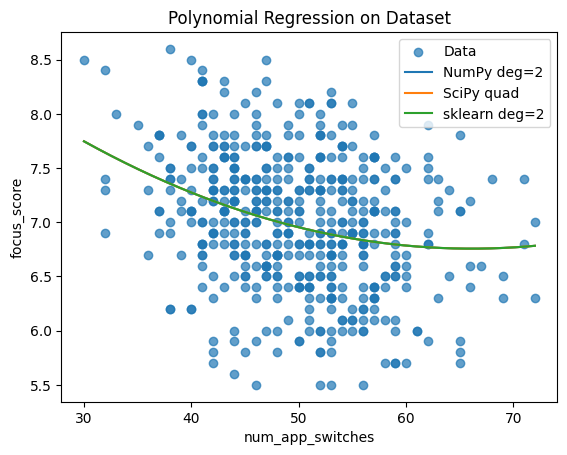

In [21]:
polynomial_regression_analysis(df, 'num_app_switches', 'focus_score')


**4) Train/Test Split and Overfitting Demonstration**

In [22]:
# Manual R^2 function
def r2_score_manual(y_true, y_pred):
    """
    Calculate the coefficient of determination (R-squared) manually.

    Parameters:
    y_true (array-like): True response values.
    y_pred (array-like): Predicted response values by the model.

    Returns:
    float: R-squared value indicating goodness of fit.
    """
    y_true = np.asarray(y_true)                         # Convert true values to numpy array
    y_pred = np.asarray(y_pred)                         # Convert predicted values to numpy array
    ss_res = np.sum((y_true - y_pred) ** 2)             # Sum of squares of residuals
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)    # Total sum of squares
    return 1 - ss_res / ss_tot                          # Calculate R^2 score

def poly_fit_r2(X_train, y_train, X_test, y_test, degree=2):
    """
    Fit a polynomial regression model of specified degree and calculate R^2 scores.

    Parameters:
    X_train (array-like): Training data for independent variable.
    y_train (array-like): Training data for dependent variable.
    X_test (array-like): Testing data for independent variable.
    y_test (array-like): Testing data for dependent variable.
    degree (int): Degree of the polynomial to fit. Default is 2.

    Returns:
    tuple: R^2 scores for training and testing datasets.
    """
    coeffs = np.polyfit(X_train, y_train, degree)         # Fit polynomial coefficients
    p = np.poly1d(coeffs)                                 # Create polynomial function from coefficients
    y_train_pred = p(X_train)                             # Predict training data outputs
    y_test_pred = p(X_test)                               # Predict testing data outputs
    r2_train = r2_score(y_train, y_train_pred)            # Compute R^2 on training data
    r2_test = r2_score(y_test, y_test_pred)               # Compute R^2 on testing data
    return r2_train, r2_test

def evaluate_poly_degrees(df, x_col, y_col, degrees=[1,2,3,5], test_size=0.3, random_state=42):
    """
    Evaluate polynomial regression models of multiple degrees on train and test splits.

    Parameters:
    df (pandas.DataFrame): Input dataset containing the features.
    x_col (str): Name of the independent variable column.
    y_col (str): Name of the dependent variable column.
    degrees (list of int): List of polynomial degrees to test. Default is [1,2,3,5].
    test_size (float): Fraction of data to reserve for testing. Default is 0.3.
    random_state (int): Seed for reproducible train-test splitting. Default is 42.

    Prints:
    Polynomial degree along with corresponding R^2 scores on training and testing data.
    """
    data = df[[x_col, y_col]].dropna()                                                                         # Drop missing values
    x = data[x_col].values                                                                                     # Extract predictor variable data
    y = data[y_col].values                                                                                     # Extract response variable data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)  # Split data

    for degree in degrees:
        r2_train, r2_test = poly_fit_r2(X_train, y_train, X_test, y_test, degree)          # Fit and evaluate
        print(f"deg={degree} | R^2 train={r2_train:.3f} | R^2 test={r2_test:.3f}")         # Output results


In [23]:
evaluate_poly_degrees(df, 'num_app_switches', 'focus_score')

deg=1 | R^2 train=0.086 | R^2 test=0.049
deg=2 | R^2 train=0.090 | R^2 test=0.066
deg=3 | R^2 train=0.091 | R^2 test=0.060
deg=5 | R^2 train=0.093 | R^2 test=0.045


**K-means Clustering**

In [24]:
from sklearn.cluster import KMeans

def perform_kmeans_clustering(data, x_col, y_col, n_clusters):
    """
    Perform K-means clustering and plot results for specified data columns.

    Parameters:
        data (DataFrame): Dataset containing clustering features.
        x_col (str): Name of feature column for x-axis.
        y_col (str): Name of feature column for y-axis.
        n_clusters (int): Number of clusters to form.

    Outputs:
        Scatter plot colored by cluster with centroids marked.
    """
    # Drop rows with missing values in clustering columns
    df_clean = data[[x_col, y_col]].dropna()

    # Fit K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_clean)

    # Store cluster labels in DataFrame
    df_clean['cluster'] = clusters

    # Set the size of the figure
    plt.figure(figsize=(12, 8))

    # Iterate through each cluster index
    for cluster in range(n_clusters):
        plt.scatter(
            df_clean[df_clean['cluster'] == cluster][x_col],  # X values for current cluster
            df_clean[df_clean['cluster'] == cluster][y_col],  # Y values for current cluster
            label=f'Cluster {cluster}' )                       # Label for legend indicating cluster number

    # Plot centroids
    plt.scatter(
        kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        c='black', s=200, marker='X', alpha=0.6, label='Centroids')

    # Add title and axis label
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'K-Means Clustering ({x_col} vs {y_col}) with k={n_clusters}')

    # Display label of the plot
    plt.legend()

    # Add grid lines
    plt.grid(True)

    # Display the plot
    plt.show()

2 clusters silhouette score = 0.31
3 clusters silhouette score = 0.26
4 clusters silhouette score = 0.24
5 clusters silhouette score = 0.25
6 clusters silhouette score = 0.24
7 clusters silhouette score = 0.23
8 clusters silhouette score = 0.23
9 clusters silhouette score = 0.22
10 clusters silhouette score = 0.20
Best number of clusters = 2


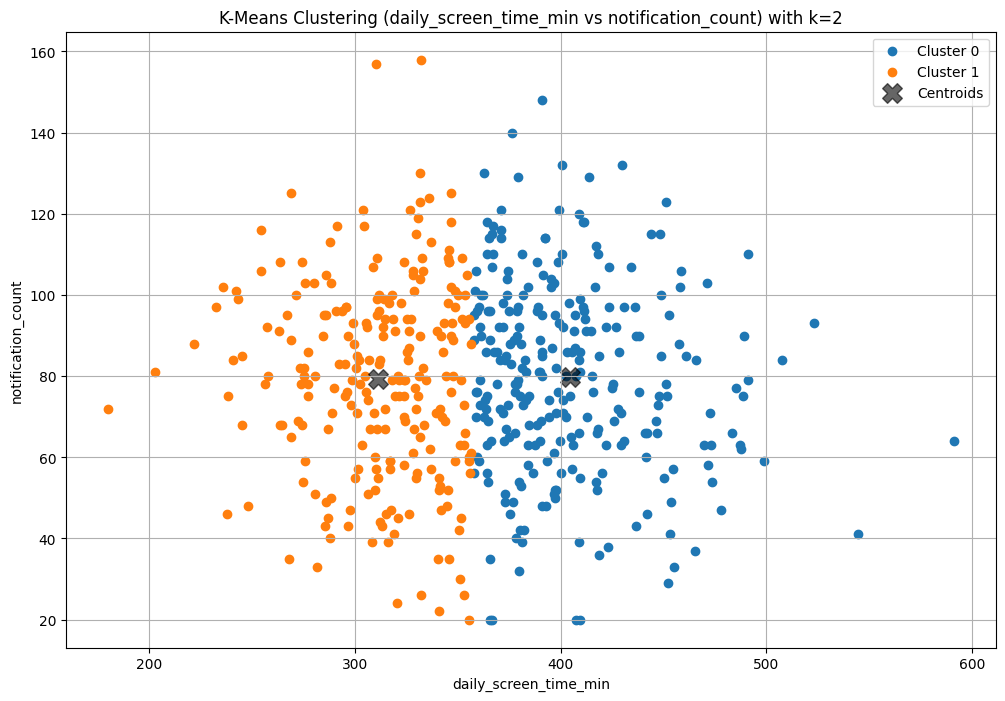

In [25]:
 best_k, wcss_vals = find_best_clusters(df, k_min=2, k_max=10)
 perform_kmeans_clustering(df, 'daily_screen_time_min', 'notification_count', best_k)